In [1]:
import sys
sys.path.append('../..')
from lib_train import *
%matplotlib inline

X_train, y_train, idx_train = load_dataset('X_train.npy', 'y_train.npy', 'idx_train.npy')
print('Loaded train = %d samples.' % len(X_train))

# Normalize samplewise if requested
if conf.normalize == 'samplewise':
    print(' normalize samplewise')
    samplewise_mean_X(X_train)

{'sampling_rate': 16000, 'duration': 1, 'hop_length': 253, 'fmin': 20, 'fmax': 8000, 'n_mels': 64, 'n_fft': 1280, 'audio_split': 'dont_crop', 'labels': ['background', 'cutting_in_focus', 'cutting_not_in_focus', 'marking', 'sleeping', 'waiting'], 'folder': PosixPath('.'), 'n_fold': 1, 'normalize': 'samplewise', 'valid_limit': None, 'random_state': 42, 'test_size': 0.01, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 50, 'verbose': 2, 'best_weight_file': 'best_model_weight.h5', 'rt_process_count': 1, 'rt_oversamples': 10, 'pred_ensembles': 10, 'runtime_model_file': 'cnn-model-laser-machine-listener.pb', 'label2int': {'background': 0, 'cutting_in_focus': 1, 'cutting_not_in_focus': 2, 'marking': 3, 'sleeping': 4, 'waiting': 5}, 'num_classes': 6, 'samples': 16000, 'rt_chunk_samples': 1600, 'mels_onestep_samples': 1600, 'mels_convert_samples': 17600, 'dims': [64, 64, 1]}


Using TensorFlow backend.


Loaded train = 480 samples.
 normalize samplewise


In [2]:
model = create_model(conf, conf.num_classes)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 32, 32, 16)   144         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 32, 32, 16)   64          Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 32, 32, 16)   0           bn_Conv1[0][0]                   
__________________________________________________________________________________________________
expanded_c

__________________________________________________________________________________________________
block_9_expand_relu (ReLU)      (None, 4, 4, 144)    0           block_9_expand_BN[0][0]          
__________________________________________________________________________________________________
block_9_depthwise (DepthwiseCon (None, 4, 4, 144)    1296        block_9_expand_relu[0][0]        
__________________________________________________________________________________________________
block_9_depthwise_BN (BatchNorm (None, 4, 4, 144)    576         block_9_depthwise[0][0]          
__________________________________________________________________________________________________
block_9_depthwise_relu (ReLU)   (None, 4, 4, 144)    0           block_9_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_9_project (Conv2D)        (None, 4, 4, 24)     3456        block_9_depthwise_relu[0][0]     
__________

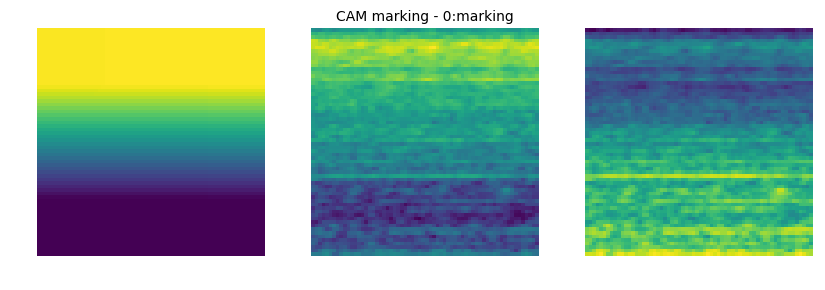

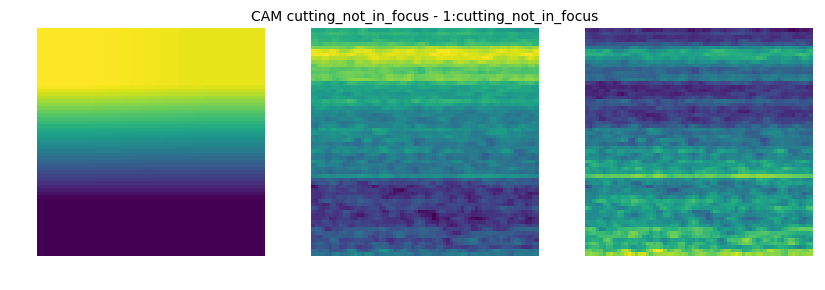

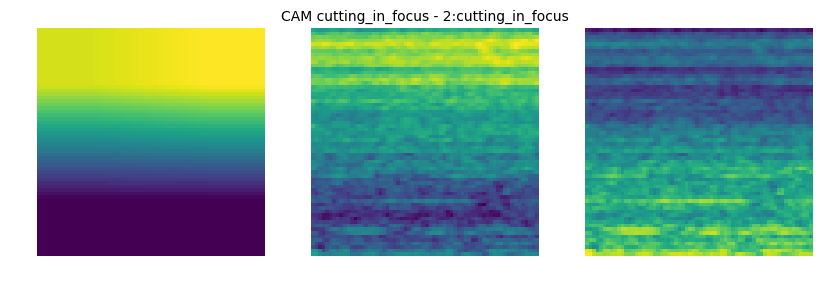

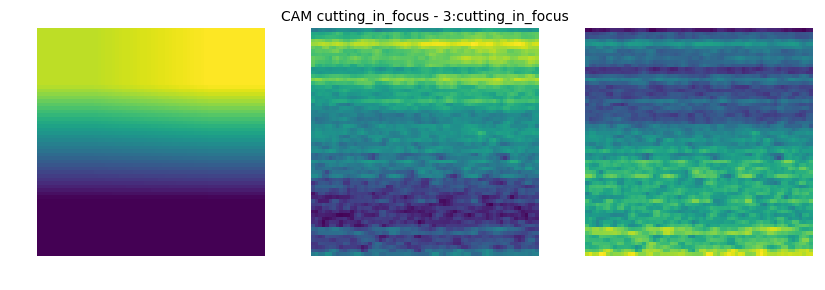

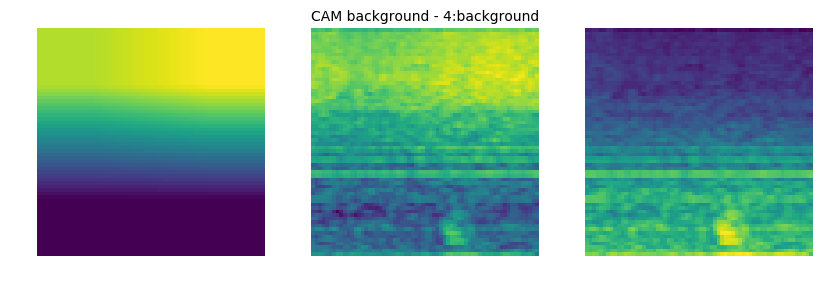

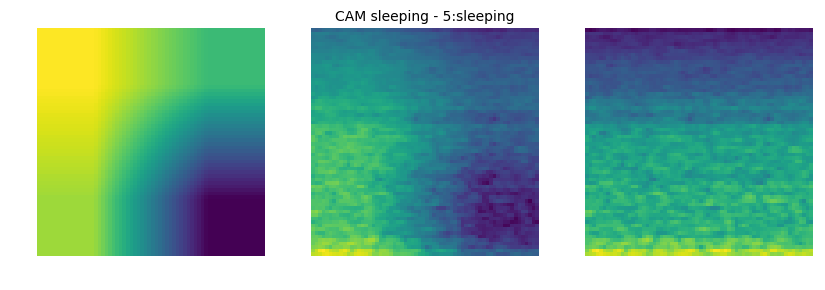

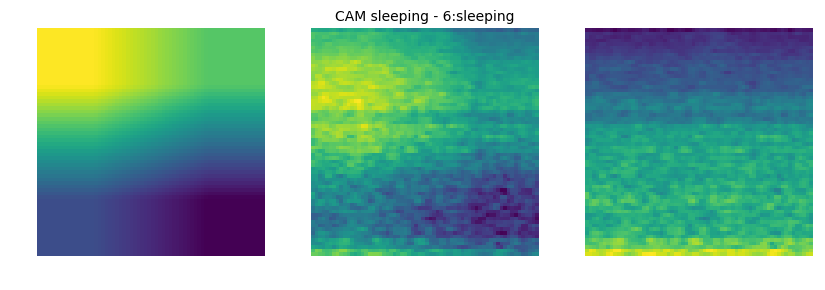

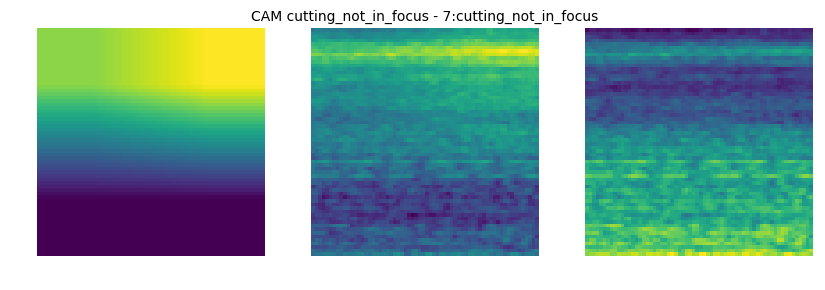

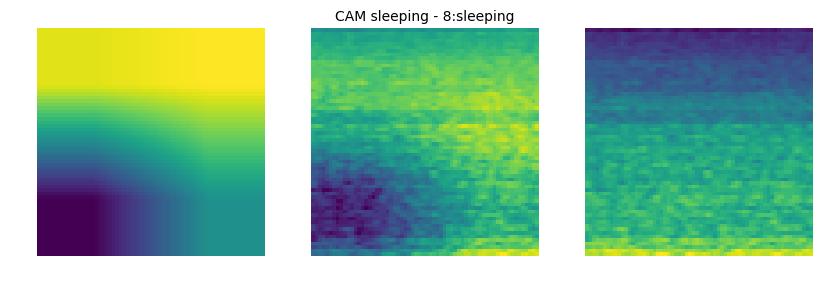

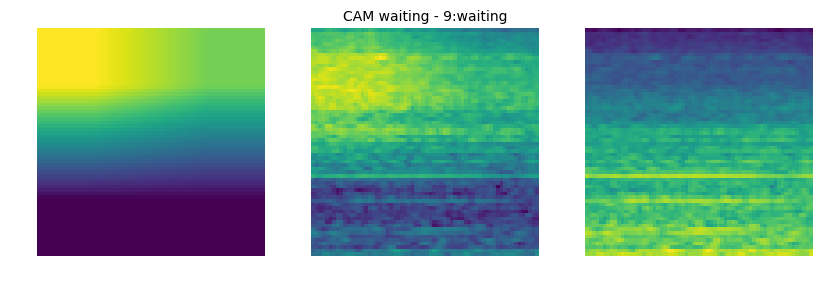

In [7]:
from visualize import visualize_cam

model.load_weights('model_based_on_fsd_model.h5')
offset = 300
for i, x in enumerate(X_train[offset:offset+10]):
    visualize_cam(conf, model, x, '{}:{}'.format(i, conf.labels[np.argmax(y_train[offset + i])]))

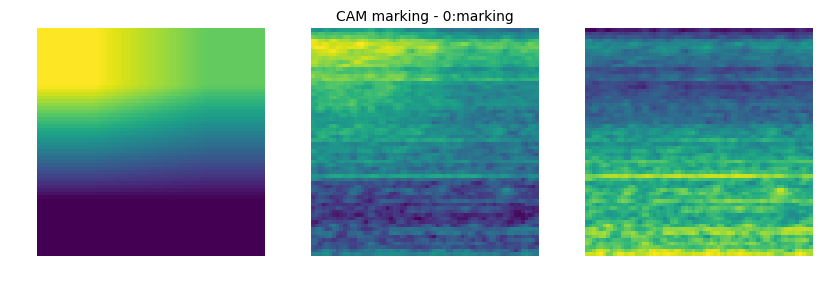

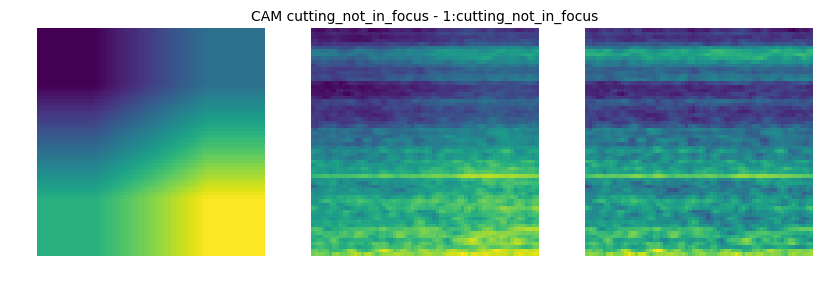

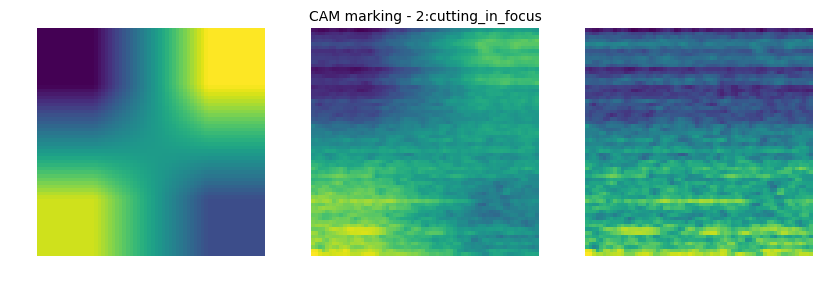

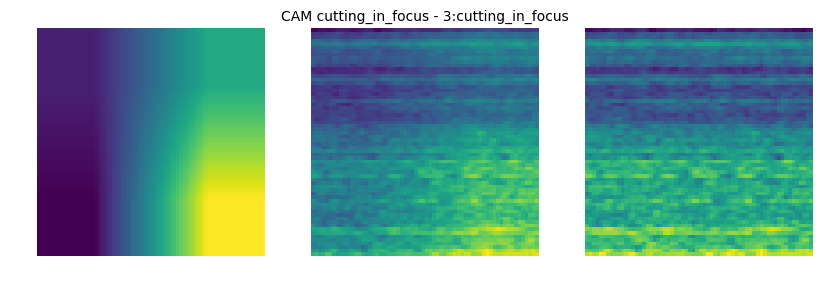

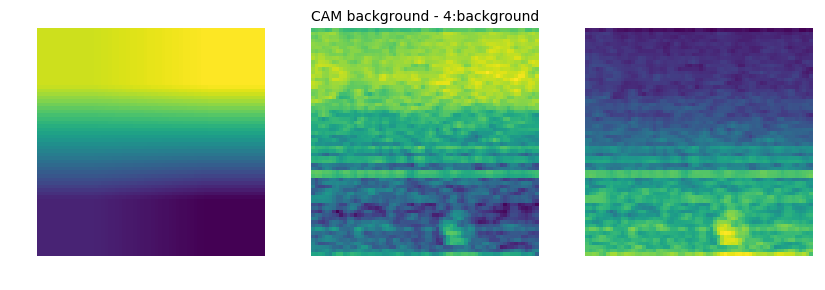

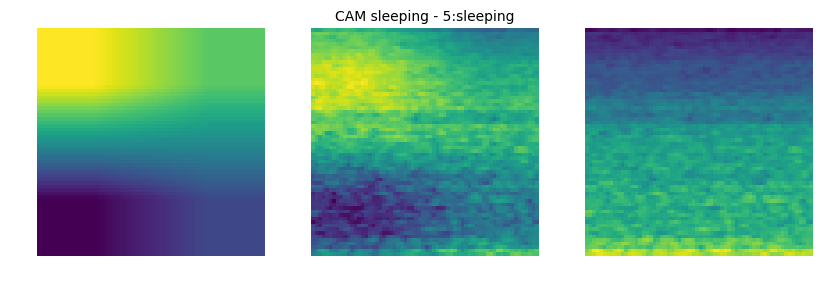

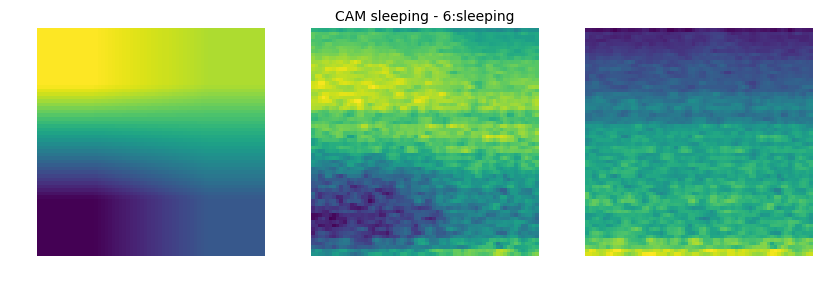

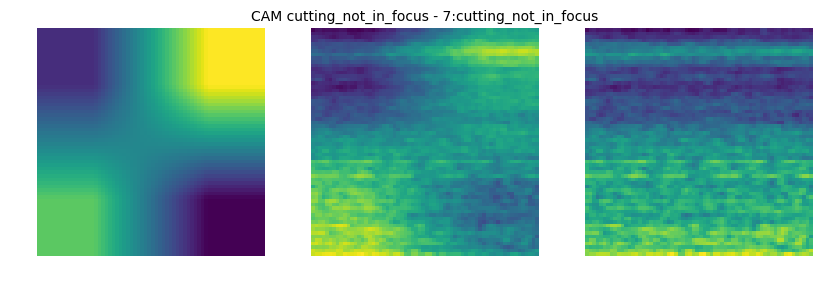

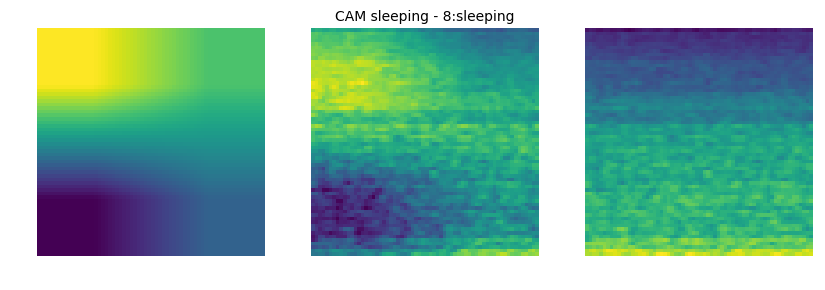

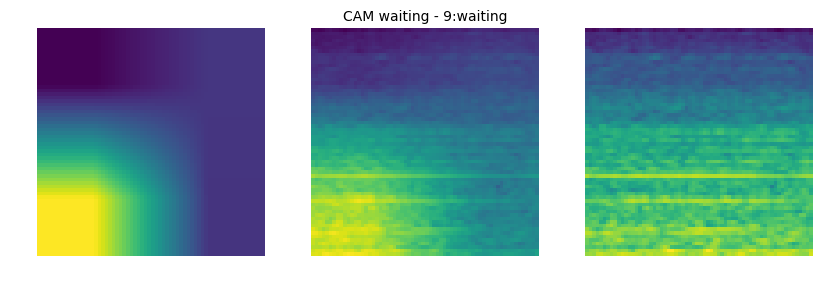

In [5]:
model.load_weights('model_from_scratch.h5')

offset = 300
for i, x in enumerate(X_train[offset:offset+10]):
    visualize_cam(conf, model, x, '{}:{}'.format(i, conf.labels[np.argmax(y_train[offset + i])]))